In [1]:
#cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

In [2]:
cd /home/roberto/Desktop/romain_ic/wavemixing_project/src

/home/roberto/Desktop/romain_ic/wavemixing_project/src


In [3]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonean_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [4]:
from qutip import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from hamiltonean_builder import *
from helper_functions.operators import *
from helper_functions.cloud import *
from file_manager.visualization_preparation_tools import *
from correlation.second_order_correlation  import *
from single_and_double_excitations_subspace.parameter_generator_for_ODE import *
from single_and_double_excitations_subspace.atomic_contributions_ODE import *
from single_and_double_excitations_subspace.QRT_dynamics_ODE import *

from post_processing.local_calculations import *
from helper_functions.cloud import *
from helper_functions.operators import *
from helper_functions.other import * 

In [5]:
N = 5
N_atoms = N

b0 = 0.1

repeat = False
if repeat == False:
    r = random_cloud(0, N, exc_radius = None, b0 = b0)

### Subspace solutions

In [6]:
R1 = get_nhat_from_angle(25)
R2 = get_nhat_from_angle(205)

tf = 1
Delta = 20
t_span, dt = np.linspace(0,tf,100, retstep = True) 

Exact:

In [7]:
taulist = t_span 

Omega_list = np.arange(0.5,6,0.4)

g2_12_by_omega_exact = np.zeros(len(Omega_list), dtype = "object")
g2_11_by_omega_exact = np.zeros(len(Omega_list), dtype = "object")


for i in range(len(Omega_list)):
    Omega = Omega_list[i]
    S_H, S_c_ops, GTensor,M, GammaSR, DeltaSR, Omega, SR_state, r = system_spec_N(1, N_atoms, kd = None, b0 = None, exc_radius = None , Delta = Delta, Omega = Omega, wave_mixing = True, scalar = True, r = r)
    rho_ss_S, total_time_ss = get_steadystate(S_H, 0, r,  0, S_c_ops, N_atoms, faseglobal = 1, rho_ss = None, rho_ss_parameter = "direct", tmax = None)

    g2_12_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R2, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    g2_11_exact, rho_ss, total_time_ss, total_time_correlation = g2_l(S_H, 0, r, R1, R1, taulist, S_c_ops, N, faseglobal = 1, rho_ss = rho_ss_S, rho_ss_parameter = "direct", tmax = None)
    
    g2_12_by_omega_exact[i] = g2_12_exact
    g2_11_by_omega_exact[i] = g2_11_exact

b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array
b0 system None
kd system None
r is an array


QRT

In [8]:
g2_12_by_omega_QRT = np.zeros(len(Omega_list), dtype = "object")
g2_11_by_omega_QRT = np.zeros(len(Omega_list), dtype = "object")


S_sigmam_i_expectations = None
S_sigmam_ij_expectations = None

for i in range(len(Omega_list)):
    Omega = Omega_list[i]
    Delta1D, Omega1D, Gamma2D, Delta2D  = GetAllODEParametersGiven_r(Omega, Delta, r, scalar = True)
    Beta1D, Beta2D, t_span, r = SolveForBeta1DandBeta2D_tau_QRT(N, kd = None , b0 = None, exc_radius = None, Delta = Delta , Omega = Omega, wave_mixing = True, scalar = True, interaction = True, r = r, taulist=t_span, Sm_1D = S_sigmam_i_expectations, Sm_2D = S_sigmam_ij_expectations )  

    g2_12_QRT = g2_dynamics_subspace_approach( r, R1, R2, taulist, Beta1D, Beta2D)
    g2_11_QRT = g2_dynamics_subspace_approach( r, R1, R1, taulist, Beta1D, Beta2D)
    
    g2_12_by_omega_QRT[i] = g2_12_QRT[0]
    g2_11_by_omega_QRT[i] = g2_11_QRT[0]
    
    print(Omega,np.average((g2_12_by_omega_QRT[i]-g2_12_by_omega_exact[i])))

0.5 -0.020520437464638573
0.9 -0.0977047919169248
1.3 -0.18676425134823343
1.7000000000000002 -0.29308958384305683
2.1 -0.41000981486272386
2.5 -0.5318052633409479
2.9000000000000004 -0.6524393471255097
3.3000000000000003 -0.7673469696881999
3.7 -0.8734252424500941
4.1 -0.9686023362565956
4.5 -1.0518915594393172
4.9 -1.1226056206146207
5.300000000000001 -1.1807196033598584
5.7 -1.2264500957037887


Calculate errors

In [9]:
error_g12_QRT_with_exact = [np.average(g2_12_by_omega_QRT[i]-g2_12_by_omega_exact[i]) for i in range(len(Omega_list))]
error_g11_QRT_with_exact = [np.average(g2_11_by_omega_QRT[i]-g2_11_by_omega_exact[i]) for i in range(len(Omega_list))]

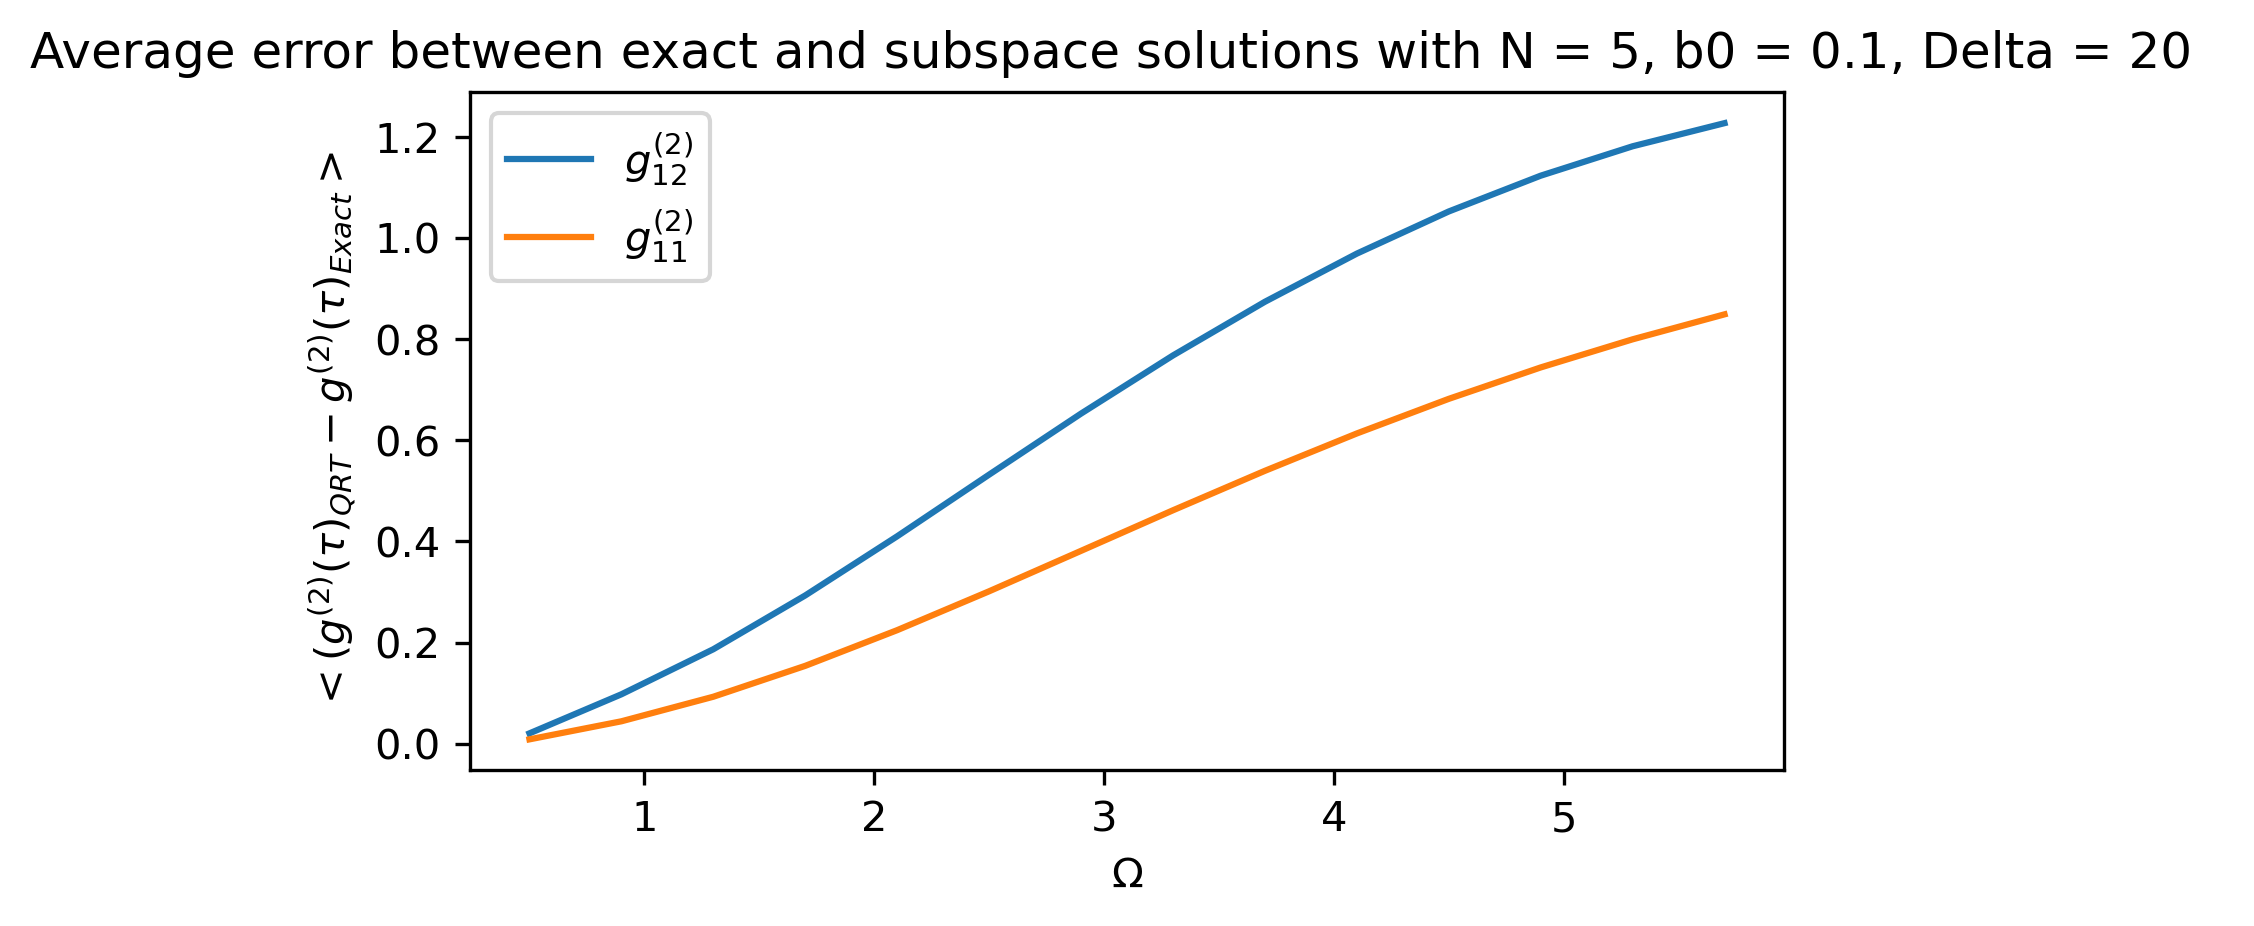

In [10]:
fig = plt.figure(figsize=(5, 3), dpi=300)
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3), dpi=300, sharex=True, sharey=True)

#plt.ylim(-0.2,14)
#plt.set_title("Mixed correlation")
plt.plot(Omega_list, np.abs(error_g12_QRT_with_exact), label = '$g^{(2)}_{12}$')
plt.plot(Omega_list, np.abs(error_g11_QRT_with_exact), label = '$g^{(2)}_{11}$')



plt.title(f"Average error between exact and subspace solutions with N = {N}, b0 = {b0}, Delta = {Delta}  ")

plt.tight_layout()
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$ <(g^{(2)}(\tau)_{QRT} - g^{(2)}(\tau)_{Exact}>  $")
plt.legend()

In [11]:
g2_12_by_omega_QRT[0]

array([0.32634237, 0.37991615, 0.55179187, 0.82970395, 1.19823062,
       1.64010853, 2.13789171, 2.66387473, 3.19061075, 3.69515271,
       4.15936637, 4.56736005, 4.90118195, 5.15503779, 5.31764205,
       5.3741076 , 5.31790451, 5.15226609, 4.88904491, 4.54533515,
       4.13901273, 3.6864946 , 3.1998731 , 2.69153227, 2.17744329,
       1.67791612, 1.2160657 , 0.81436758, 0.48879319, 0.24481437,
       0.08820422, 0.02113253, 0.04364621, 0.15396436, 0.34685252,
       0.61051857, 0.92756854, 1.28735832, 1.67137978, 2.06116454,
       2.4405657 , 2.79576928, 3.11376358, 3.37972741, 3.58801889,
       3.73266216, 3.80210364, 3.79033061, 3.69787852, 3.53143466,
       3.30216269, 3.02316688, 2.70757119, 2.36629727, 2.00844855,
       1.64442203, 1.28698785, 0.95112421, 0.65266675, 0.40610362,
       0.22005214, 0.09578837, 0.03647701, 0.04258341, 0.11267632,
       0.24352512, 0.42917042, 0.65921551, 0.91831437, 1.19876853,
       1.48824483, 1.7731052 , 2.04151921, 2.28376325, 2.49164

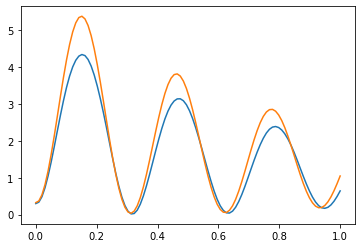

In [12]:
plt.plot(taulist, g2_12_by_omega_QRT[3], label = '$g^{(2)}_{12}$')
plt.plot(taulist, g2_12_by_omega_exact[3], label = '$g^{(2)}_{12}$')
